# Data Analysis Toolkit
# Iowa State University
## Professor Nelson

# Mission Information
## Mission 1XX

## Mission Statement
Example mission statement. This statement should describe the mission at hand and what the objectives are.

## Mission Status
This will state whether the mission is in planning, active, or complete.

**Mission Status: COMPLETE**


# Flight Information
# Flight ID - L-1XX-A
## Current Flight: FLOWN

## Flight Status: RECOVERED

## **Spacecraft Status: SECURE**

## Flight Restrictions

* Spacecraft must comply with all FCC rules and regulations
* Spacecraft and Flight must follow all FAA FAR 101 rules and regulations
* Flight must take place during the Annular Eclipse
* The payload must not exceed 3 kg
* Spacecraft and payload must pass integration and inspection from Professor Nelson

## Flight Summary

> Flight 1XX-A will be the first flight out of two flown during the Annular Eclipse. Launch location will be north of Socorro, NM. This spacecraft will carry the Montana Tracking payload with the Raspberry Pi with the video streaming system.

## Mission Synopsis

| Principal Investigator | **Matthew Nelson** |
| --- | --- |
| Funding Source | M2I/ISGC/NEBP |
| Mission Manager | Brody Echer |
| Chief Engineer | Nick Goeckner |
| Launch Director | Michael Tallman |
| Flight Director | Andrew Krall |
| Recovery Director |  |

## Flight Information

HABET Flight LX-169-A will be a flight to fly a payload full of candy for 4H.

| Flight Designation | L-169-A |
| --- | --- |
| Status | Done |
| Flight Purpose | Record data during the annular eclipse |
| Flight Dynamics | Fly to float of 80,000, after the eclipse cutaway to descend with chute |
| Balloon | 1600 g |
| Spacecraft | Orion |
| Launch | Oct. 14th at 9:30 a.m. (MST) |

## Payload Requirements

| Parameter | Request |
| --- | --- |
| Altitude | Float |
| Duration | 3hr + |
| Exposure | Not required |
| Power | 5 V @ 500 mA |
| Data | 9600 bps |
| Frequencies in use | none |
| Images/Video | Go-Pro 360 |


## Avionics

| Spot | Specs |
| --- | --- |
| Purpose | Tracking (backup) |
| Manufacturer | Spot |
| Mass | 500 g |
| Power | 4x AAA Lithium batteries independent battery source |
| Batteries checked | Oct. 11th, 2023 **OK 1.7 VDC each** |
| Frequencies | Iridium Satellite Network (1.2 GHz) |
| Transmitter Check | Oct. 11th, 2023 **OK** |
| HW Version | unknown |
| FW Version | Unknown |
| Flight Worthiness Check | Oct. 11th, 2023 - **OK** |


| Iridium | Specs |
| --- | --- |
| Purpose | Tracking and trigger float valve and cutdown |
| Manufacturer | NAL |
| Mass | 500 g |
| Power | 3.7 Li-Ion @ 4600 mAh independent battery source |
| Batteries checked | Oct. 11th, 2023 **OK 4.1 VDC** |
| Frequencies | Iridium Satellite Network (1.2 GHz) |
| Transmitter Check | Oct. 11th, 2023 **OK** |
| HW Version | unknown |
| FW Version | 2.1.2 |
| Flight Worthiness Check | Oct. 11th, 2023 - **OK** |


| HAR | Specs |
| --- | --- |
| Purpose | Primary flight computer |
| Manufacturer | ISU |
| Mass | 500 g |
| Power | 3.7 Li-Ion @ 2200 mAh independent battery source |
| Batteries checked | Oct. 11th, 2023 **OK 4.1 VDC** |
| Frequencies | LoRa - 915 MHz |
| Transmitter Check | Oct. 11th, 2023 **OK** |
| HW Version | 3.5 |
| FW Version | 4.0 |
| Flight Worthiness Check | Oct. 11th, 2023 - **OK** |


READINESS REVIEW NOTES:


# Import
With Python, there are some additional libraries/modules that are needed. These will need to be installed ahead of time. If you are using Anaconda, most of these are installed by default. If not, you can use *pip* to install these. 

## Pandas
Pandas is used to import CSV files and is used to manage the data. It is very good at handling large amounts of data. It also gives us some tools for working with the data as well.

## Tilemapbase
This module gives us access to plotting on a map and handles the downloading of the Open Street Map tiles that we can use. This module is **not** usually installed by default with Anaconda. Use *pip install tilemapbase* to install it.

## SimpleKML
This module allows us to export our GPS data as a KML file in case we want to view this in something like Google Earth. This module is **not** usually installed by default with Anaconda. Use *pip install simplekml* to install it.

## NumPy
A very common numerical methods module used for performing some math on our data

## MatPlotLib
Another common module used for graphing.

## Datetime
Used to do conversions on date/time stamps in GPS data.

In [3]:
# Import Mapping software
import tilemapbase

# Pandas for data analysis
import pandas as pd

# Setup Matplotlib to work in Jupyter notebooks
%matplotlib inline

#Import needed libraries, mainly numpy, matplotlib and datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta, date
import simplekml

# Import the Image function from the IPython.display module.
from IPython.display import Image

# Initial Conditions
It is useful to have a few variables setup now so you don't need to worry about them later. These variables can all be changed in one place and then accessed later as needed. This way you can set these now and then just run the entire notebook. We will set the following variables:

- Launch Location (latitude,longitude)
- Launch date/time (month-day-year HH:MM:SS)
- Flight ID (ex. L-158-D)

In [4]:
# Launch Coordinates in Decimal Degrees
launch_loc = (37.708989, -89.216643)

#Flight ID - Example LX-158-C
flight_id = 'L-1XX-A'

#set the date and time format
date_format = '%m-%d-%Y %H:%M:%S'
launch_date = date(2024, 4, 8)
launch_time = datetime.strptime('4-8-2024 12:59:00',date_format)

# Weather information at alaunch site
weather_temp = 75
weather_wind = 12
weather_clouds = 20
weather_pressure = 29.46

#set the DPI for saved graphs/plots
img_dpi = 300

## Read and Parse the file
We can use Pandas to read the CSV files and store them as a Pandas dataframe. The CSV files do not have headers on them. So, we will also go ahead and add labels for the columns as well. For this example, we will look at HAR data and data from Iridium. 

In [6]:
har_df = pd.read_csv('data/HARdata.csv')
iridium_df = pd.read_csv('data/Iridium_data.csv')
har_df.columns =['Device','Time', 'Lat', 'Lon', 'Altitude', 'Heading','Speed','PDOP','Pressure','Temp','Humidity']
# Convert data
# Data is stored as integers for efficiency. This "unpacks" that to the proper values
har_df['Lon'] /= 10000000
har_df['Lat'] /= 10000000
har_df['Altitude'] /= 1000
har_df['Temp'] = har_df.Temp / 100
har_df['Humidity'] = har_df.Humidity / 1000
har_df['Pressure'] = har_df.Pressure / 100
har_df['Time'] = pd.to_datetime(launch_date.strftime('%Y-%m-%d ') + har_df['Time'],format='%Y-%m-%d %H:%M:%S')
har_df['Speed'] = har_df.Speed / 10
har_df['PDOP'] = har_df.PDOP / 10
har_df['Heading'] = har_df.Heading / 100000

# First, ensure that your 'Time' column is timezone-aware
har_df['Time'] = pd.to_datetime(har_df['Time']).dt.tz_localize('UTC')

# Now convert from UTC to Central Time
har_df['Time'] = har_df['Time'].dt.tz_convert('America/Chicago')

print(har_df.head())
print(iridium_df.head())


  Device                      Time        Lat        Lon  Altitude    Heading  \
0  $$HAR 2024-04-08 12:53:04-05:00  37.708953 -89.216677   122.095  241.59052   
1  $$HAR 2024-04-08 12:53:07-05:00  37.708992 -89.216706   109.131  241.59052   
2  $$HAR 2024-04-08 12:53:10-05:00  37.709024 -89.216722   104.008  241.59052   
3  $$HAR 2024-04-08 12:53:13-05:00  37.709054 -89.216704   108.237  241.59052   
4  $$HAR 2024-04-08 12:53:16-05:00  37.709072 -89.216684   111.528  241.59052   

   Speed  PDOP  Pressure   Temp  Humidity  
0   27.2  14.1   1000.94  38.70    15.906  
1   34.7  13.9   1000.94  38.70    15.912  
2   83.8  14.4   1000.94  38.70    15.916  
3   39.8  13.8   1000.94  38.70    15.922  
4   37.6  13.4   1000.94  38.71    15.922  
                                    uid              datetime   latitude  \
0  0ae69830-a624-4491-9dec-ca5d908dff40  2024-04-08T16:54:35Z  37.708933   
1  0ae69830-a624-4491-9dec-ca5d908dff40  2024-04-08T16:55:34Z  37.708933   
2  0ae69830-a624-4491

# Flight Information
We can now do some calculations on a few stats on the flights. Let's start by calculating the flight time. Since both HAR and Iridium use timestamps from the GPS, we know when these are running. However, it should be noted that both are in UTC (Zulu) time, so that needs to be noted so we can convert to local time if needed.

In [7]:
print('Launch date is:',launch_time.date())
print('Launch time is:',launch_time.time())
time_sec = len(har_df)*3
flight_time = har_df
flight_time = timedelta(seconds=time_sec)
landing_time = har_df['Time'].iloc[-1].tz_convert('UTC')
set_time = pd.Timestamp('2024-04-08 16:59:00').tz_localize('UTC')
# Calculate the time difference
time_difference = landing_time - set_time
print('Flight time is:',time_difference)
print('Landing time is:',landing_time)

Launch date is: 2024-04-08
Launch time is: 12:59:00
Flight time is: 0 days 03:31:57
Landing time is: 2024-04-08 20:30:57+00:00


## Distance
We can also look at the Launch location and final landing coordinates to get our distance. To do that, we simply look at the last data point. This assuming of course that everything was shutdown at the landing site.

In [8]:
from math import radians, sin, cos, acos, atan2,sqrt

# approximate radius of earth in km
R = 6373.0

lat1 = radians(launch_loc[0])
lon1 = radians(launch_loc[1])
lat2 = radians(har_df['Lat'].iloc[-1])
lon2 = radians(har_df['Lon'].iloc[-1])

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print('Result: %.2f km' % distance)

Result: 175.93 km


# Minimum and Maximum Data points
Before we graph the data, let's look at some minimum and maximum data points that were collected. 

In [9]:
print('The maximum temperature recorded inside the payload was',har_df.Temp.max(),'C')
print('The minimum temperature recorded inside the payload was',har_df.Temp.min(),'C')
print('The maximum humidity recorded inside the payload was',har_df.Humidity.max(),'%')
print('The minimum humidity recorded inside the payload was',har_df.Humidity.min(),'%')

The maximum temperature recorded inside the payload was 39.1 C
The minimum temperature recorded inside the payload was -16.4 C
The maximum humidity recorded inside the payload was 61.597 %
The minimum humidity recorded inside the payload was 1.828 %


## Min/Max Dewpoint
Since we have both humidity and temperature, we can also calculate the dewpoint. Dewpoint is calculated as below.

$T_{temp} - (\frac{(100 - H_{humidity})}{5})$

In [10]:
print('The maximum dewpoint recorded inside the payload was {:.2f} C'.format(har_df.Temp.max()-((100 - har_df.Humidity.max())/5.0)))
print('The minimum dewpoint recorded inside the payload was {:.2f} C'.format(har_df.Temp.min()-((100 - har_df.Humidity.min())/5.0)))

The maximum dewpoint recorded inside the payload was 31.42 C
The minimum dewpoint recorded inside the payload was -36.03 C


# Pressure
HAR has a pressure sensor, so we can look at that sensor as well.

In [11]:
print('The maximum pressure recorded inside the payload was',har_df.Pressure.max(),'hPa')
print('The minimum pressure recorded inside the payload was',har_df.Pressure.min(),'hPa')

The maximum pressure recorded inside the payload was 1001.02 hPa
The minimum pressure recorded inside the payload was 12.69 hPa


# Altitude
We can calculate altitude two different ways. The first is looking at the GPS data. The second is to calculate that based on the pressure data. In order to do that however, we need to know what the pressure reading was on the ground at launch.

In [9]:
print('The maximum altitude obtained is',har_df.Altitude.max(),'m, or',(har_df.Altitude.max()*3.2808),'ft')

The maximum altitude obtained is 28320.039 m, or 92912.38395120001 ft


# Eclipse Times
Since we launched from Carbondale, IL, the eclipse started at 1243, totality happened at 1359 till 1403 and the eclipse ended at 1518, all times are local times. 

In [10]:
set_times = ['2024-04-08 17:43:00', '2024-04-08 18:59:00', '2024-04-08 19:03:00','2024-04-08 20:18:00']
set_labels = ['Eclipse Begins','Totality Begins','Totality Ends','Eclipse Ends']
# Convert set times to pandas Timestamp objects
set_times = [pd.Timestamp(time) for time in set_times]

# Graphing
The following graphs are from the HAR board's BME680 sensor connected via a QWIIC connector and the GPS also connected via the QWIIC connector. HAR is located inside the spacecraft and is mostly shielded from direct light and the foam around the spacecraft does provide insulation. The spacecraft is not sealed, so the pressure will adjust based on external pressure. 

## Altitude
Let's start by graphing the altitude. This attitude is based on the GPS sensor and not on the pressure sensor with this current version.

For HABET Flight L-169-A, a cutdown command was sent. There was no confirmation back that the command was received. We believe the balloon did fly to burst as the maximum altitude is close to the predicted burst altitude. However, the cutdown system was triggered. We think that was triggered due to the 4-hour timer built into the cut down device as a safety measure to make sure the balloon does not float.

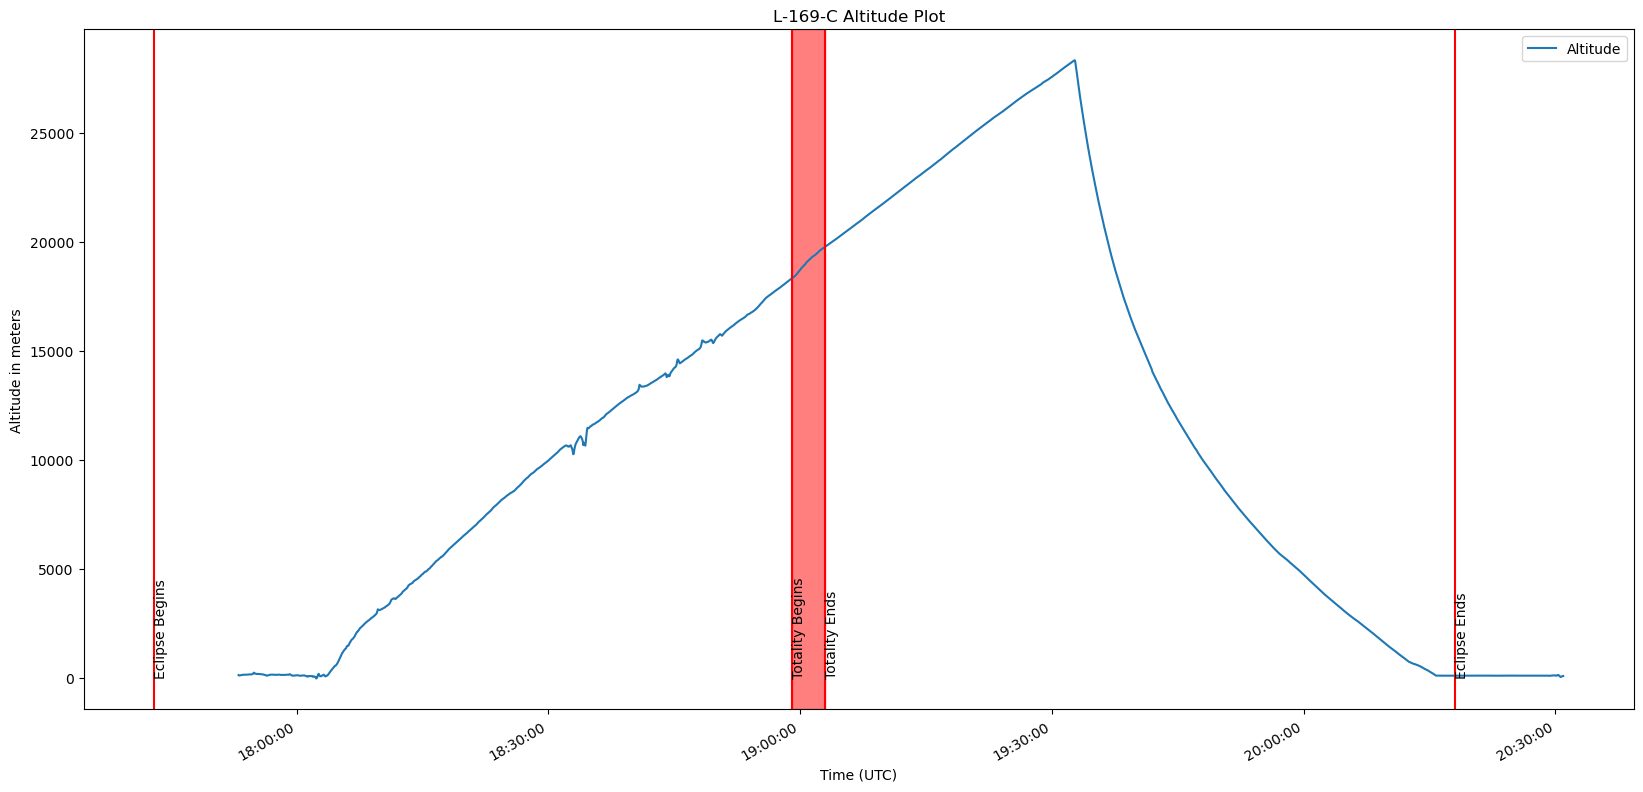

In [11]:
har_df.plot(title='{} Altitude Plot'.format(flight_id),ylabel='Altitude in meters',xlabel='Time (UTC)',x='Time',y='Altitude',figsize=(20, 10))
# Add vertical lines at set times
for time, label in zip(set_times,set_labels):
    plt.axvline(x=time, color='r')
    plt.text(time, 1, label, rotation=90, verticalalignment='bottom')

# Add shaded area between the two vertical lines
plt.axvspan(set_times[1], set_times[2], color='red', alpha=0.5)
# Change x-axis labels to only show time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.savefig('Plots/har_alt_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_alt_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Temperature
Please note that the temperature sensor for HAR was located inside the spacecraft. There will be some self-heating from the sensor and from other equipment inside the spacecraft including the Raspberry Pi and the Rocket M5 which both generate quite a bit of heat during normal operation.

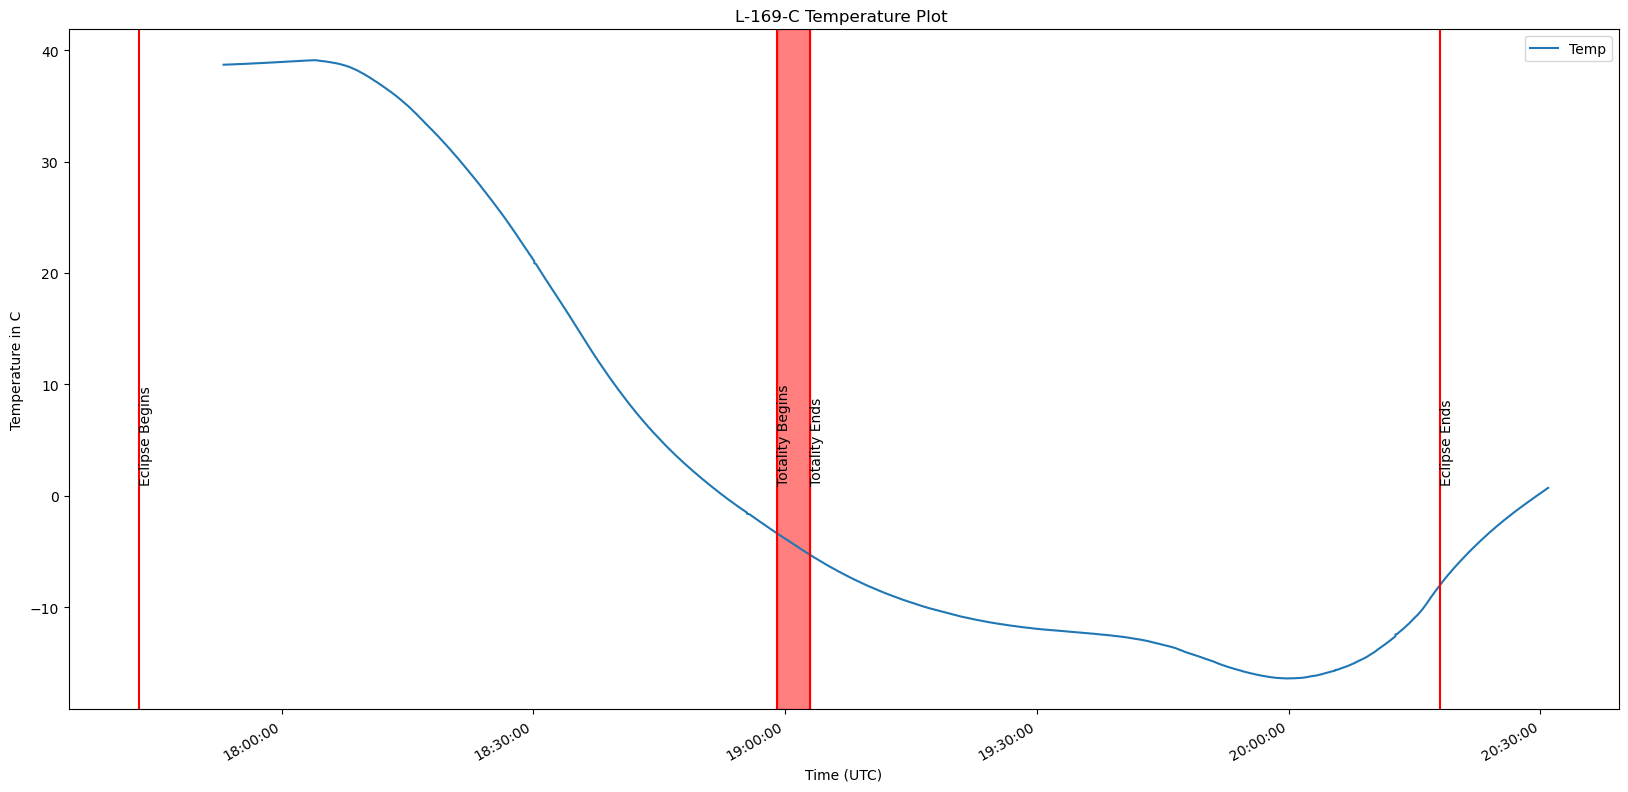

In [12]:
har_df.plot(title='{} Temperature Plot '.format(flight_id),ylabel='Temperature in C',xlabel='Time (UTC)',x='Time',y='Temp',figsize=(20, 10))

# Add vertical lines at set times
for time, label in zip(set_times,set_labels):
    plt.axvline(x=time, color='r')
    plt.text(time, 1, label, rotation=90, verticalalignment='bottom')

# Add shaded area between the two vertical lines
plt.axvspan(set_times[1], set_times[2], color='red', alpha=0.5)
# Change x-axis labels to only show time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.savefig('Plots/har_temp_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_temp_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Humidity


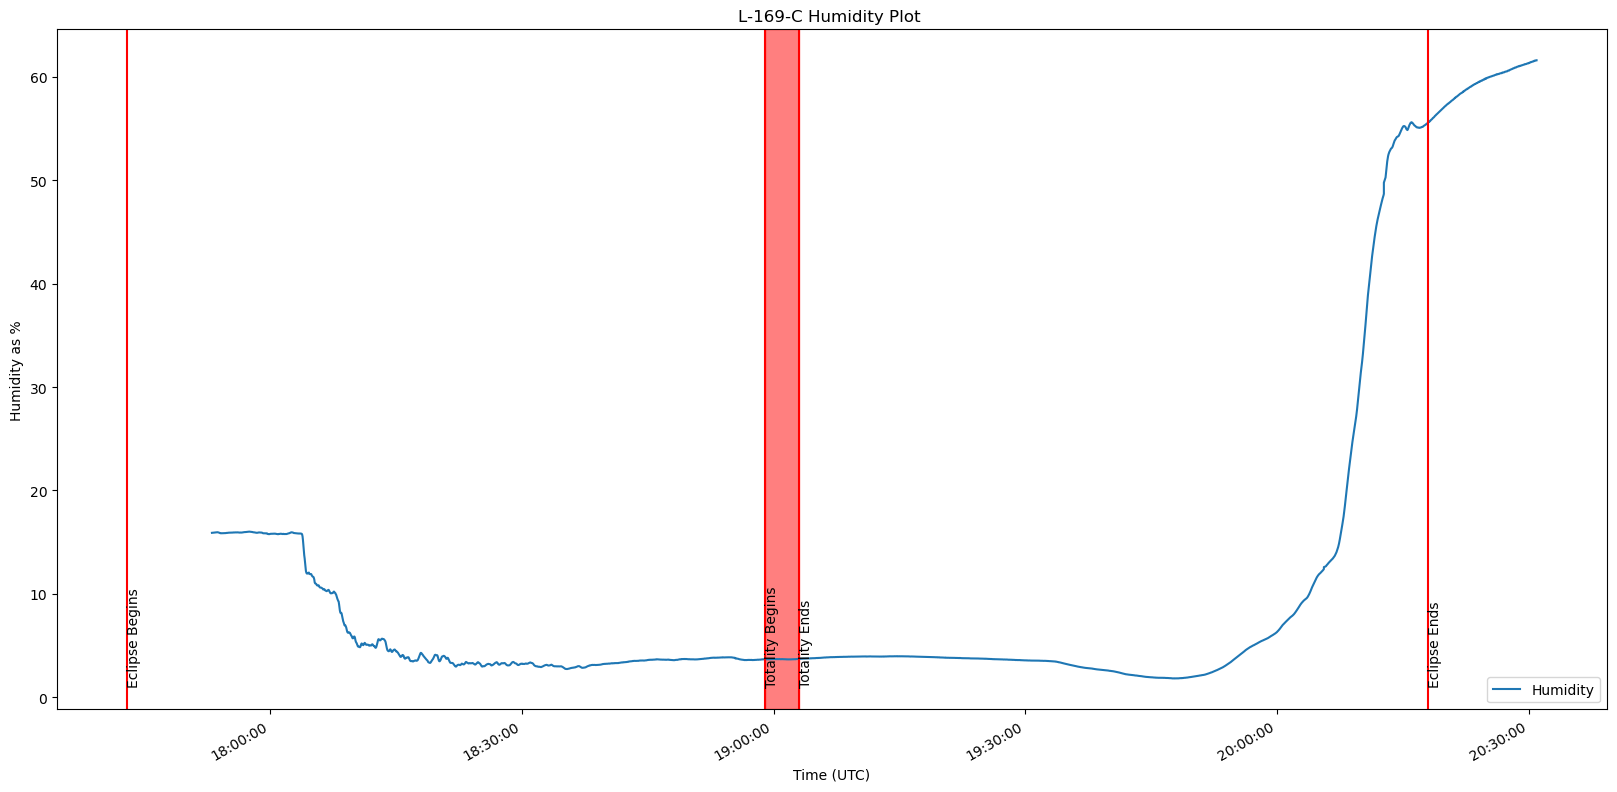

In [13]:
har_df.plot(title='{} Humidity Plot '.format(flight_id),ylabel='Humidity as %',xlabel='Time (UTC)',x='Time',y='Humidity',figsize=(20, 10))

# Add vertical lines at set times
for time, label in zip(set_times,set_labels):
    plt.axvline(x=time, color='r')
    plt.text(time, 1, label, rotation=90, verticalalignment='bottom')

# Add shaded area between the two vertical lines
plt.axvspan(set_times[1], set_times[2], color='red', alpha=0.5)
# Change x-axis labels to only show time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.savefig('Plots/har_humidity_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_humidity_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Pressure


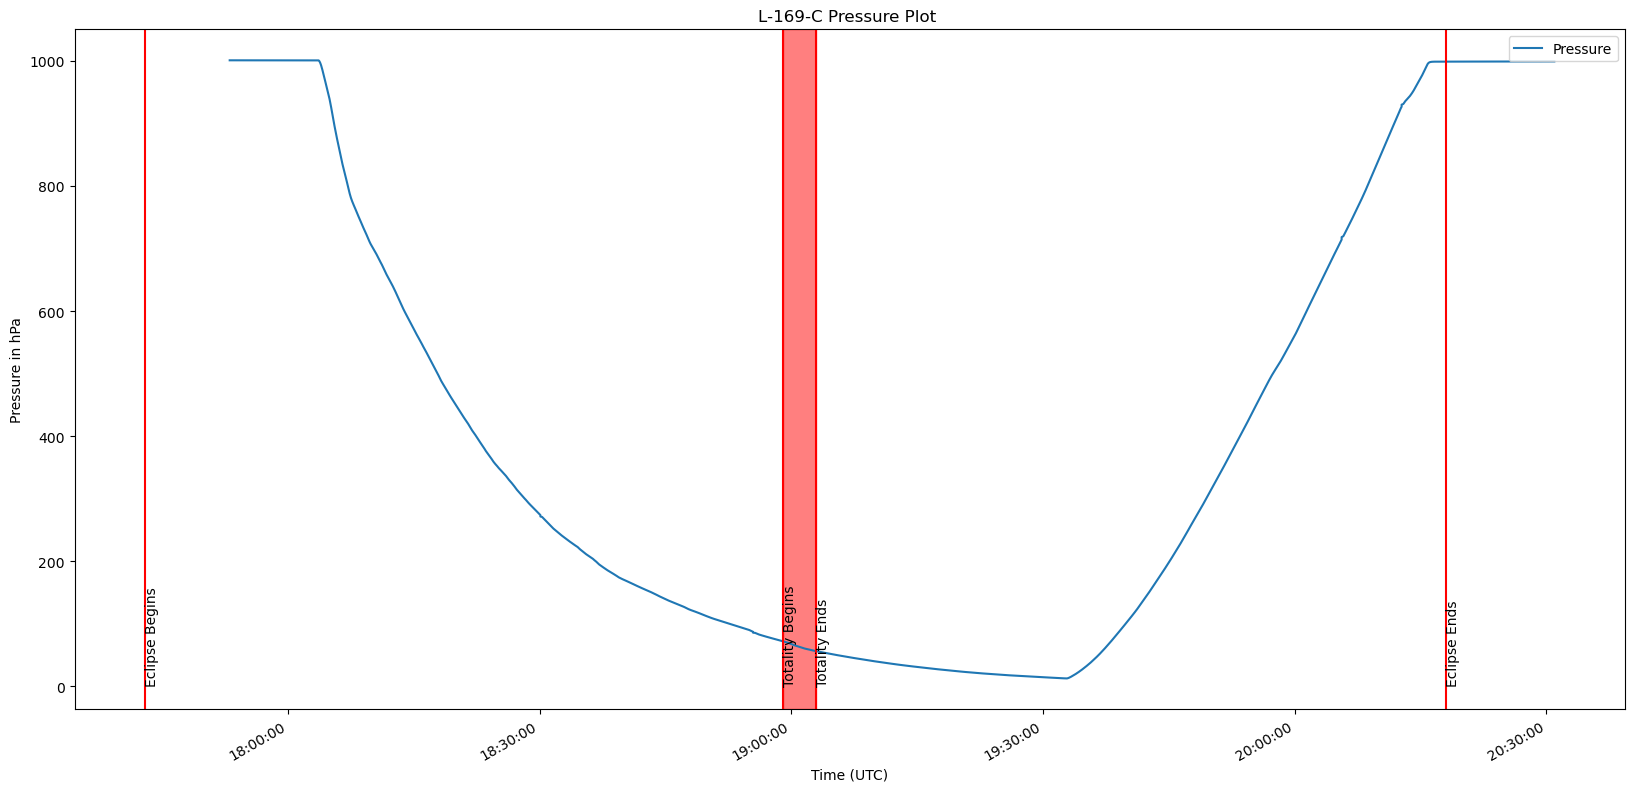

In [14]:
har_df.plot(title='{} Pressure Plot '.format(flight_id),ylabel='Pressure in hPa',xlabel='Time (UTC)',x='Time',y='Pressure',figsize=(20, 10))

# Add vertical lines at set times
for time, label in zip(set_times,set_labels):
    plt.axvline(x=time, color='r')
    plt.text(time, 1, label, rotation=90, verticalalignment='bottom')

# Add shaded area between the two vertical lines
plt.axvspan(set_times[1], set_times[2], color='red', alpha=0.5)
# Change x-axis labels to only show time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.savefig('Plots/har_pressure_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_pressure_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Temp vs Altitude
It's useful to look at this data vs Altitude. 

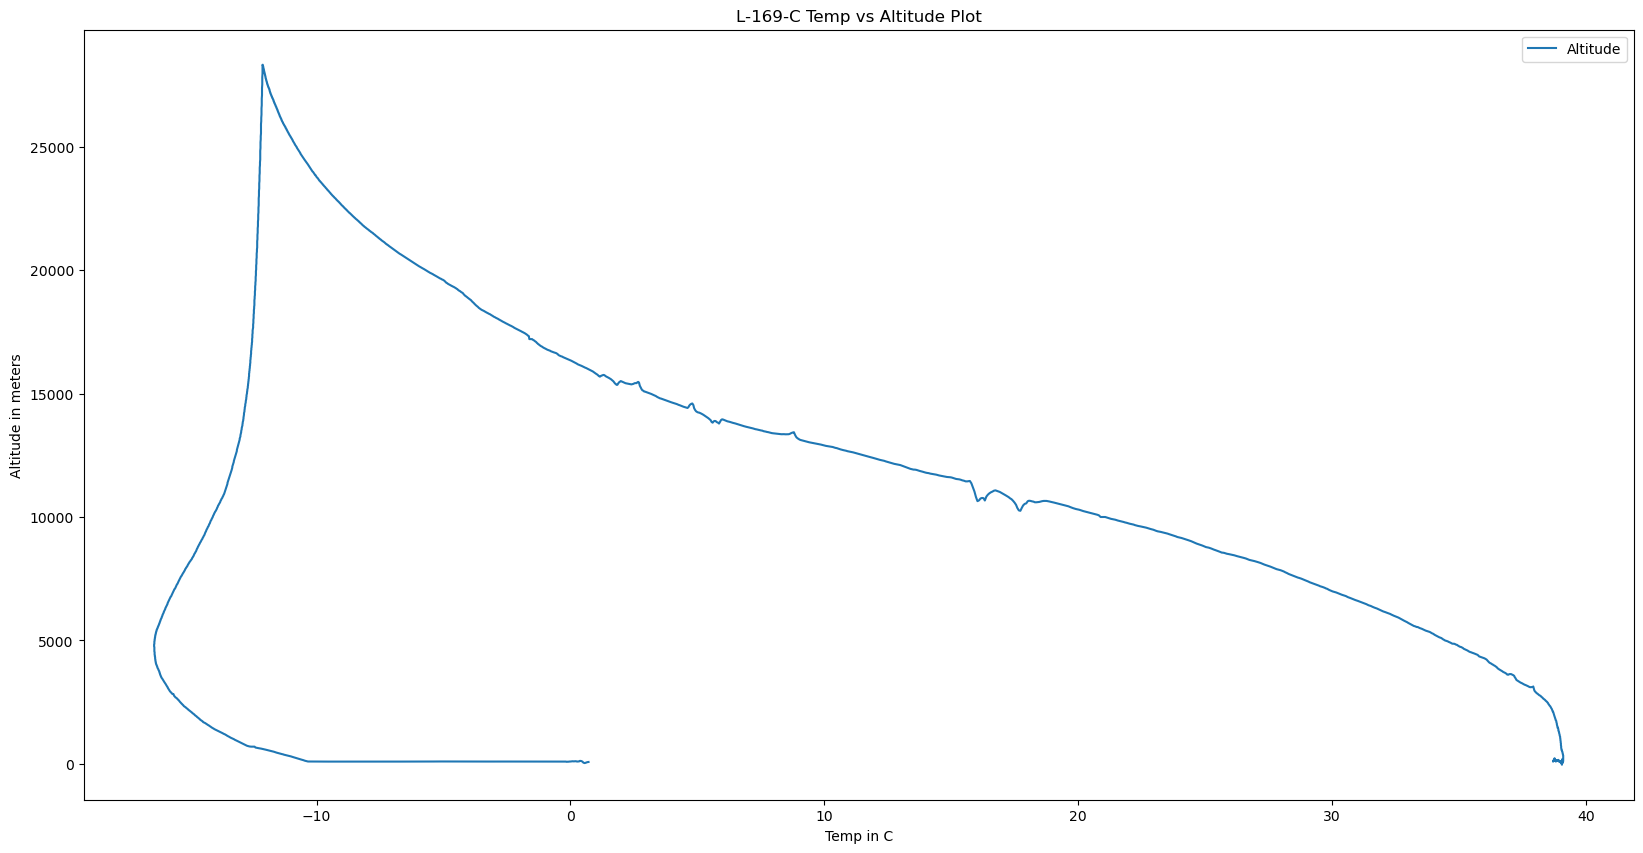

In [15]:
har_df.plot(title='{} Temp vs Altitude Plot'.format(flight_id),ylabel='Altitude in meters',xlabel='Temp in C',x='Temp',y='Altitude',figsize=(20, 10))

plt.savefig('Plots/tempalt_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/tempalt_plot.png',bbox_inches = 'tight',dpi = img_dpi)

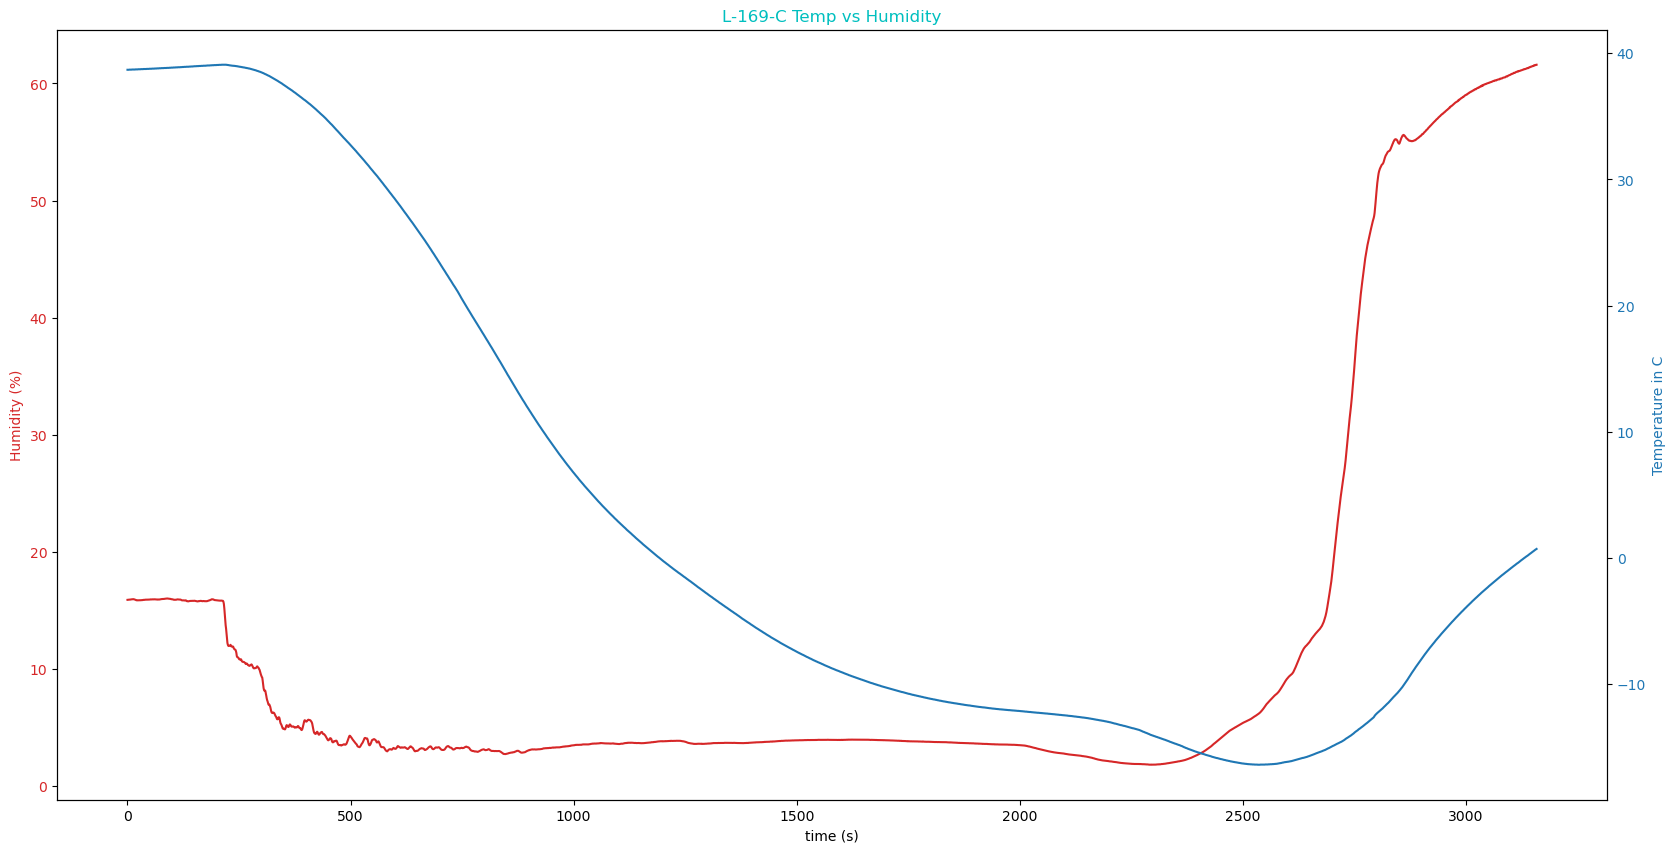

In [16]:
# Setup fixed points for graphing with

# Turn on subplots
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Humidity (%)', color=color)
ax1.plot(har_df.Humidity,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature in C', color=color)  # we already handled the x-label with ax1
ax2.plot(har_df.Temp)
ax2.tick_params(axis='y', labelcolor=color)

# Always have a good title
plt.title("{} Temp vs Humidity".format(flight_id),color='c')
# This allows us to save our pretty graph so we can frame it later
plt.savefig('Plots/temp_humidity.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/temp_humidity.png',bbox_inches = 'tight',dpi = img_dpi)

# Temp vs Pressure

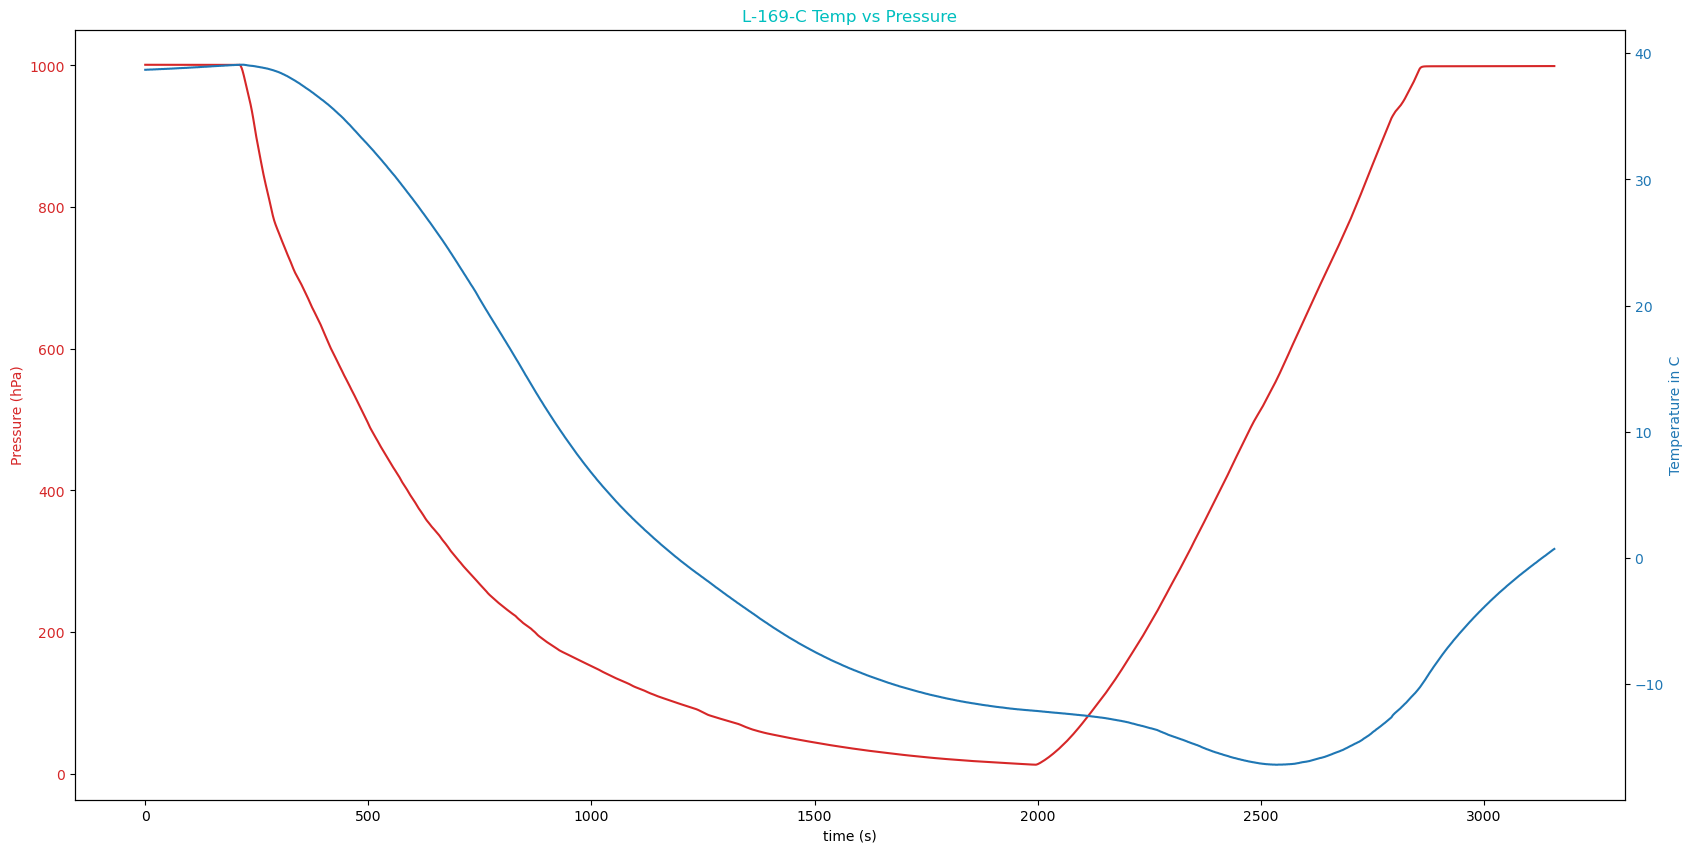

In [17]:
# Setup fixed points for graphing with

# Turn on subplots
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (hPa)', color=color)
ax1.plot(har_df.Pressure,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature in C', color=color)  # we already handled the x-label with ax1
ax2.plot(har_df.Temp)
ax2.tick_params(axis='y', labelcolor=color)

# Always have a good title
plt.title("{} Temp vs Pressure".format(flight_id),color='c')
# This allows us to save our pretty graph so we can frame it later
plt.savefig('Plots/temp_pressure.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/temp_pressure.png',bbox_inches = 'tight',dpi = img_dpi)

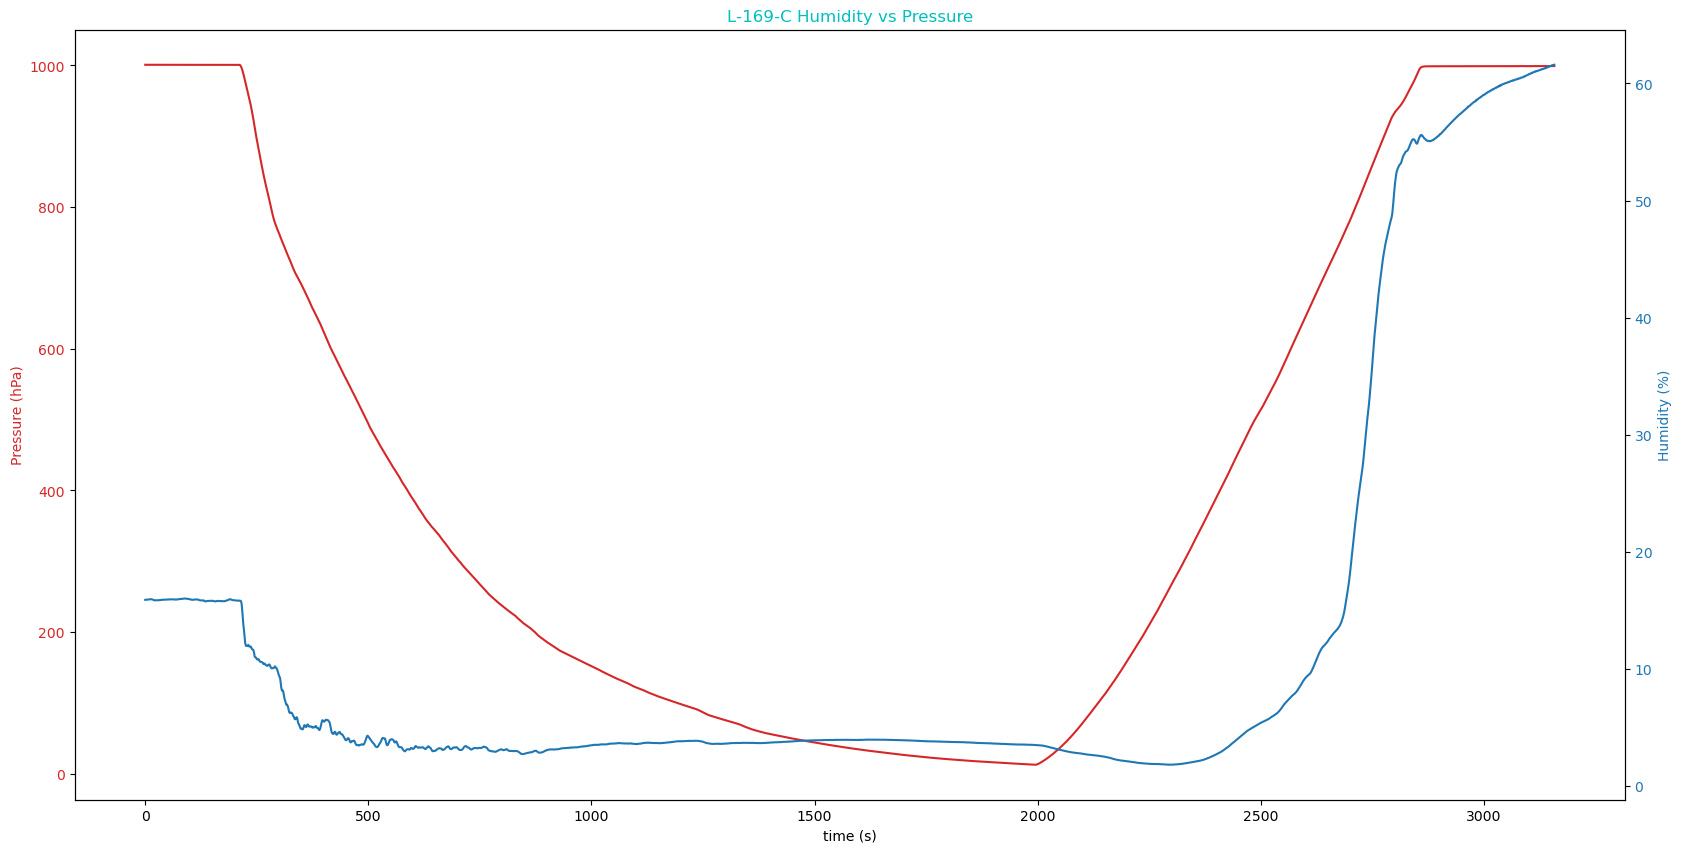

In [18]:
# Setup fixed points for graphing with

# Turn on subplots
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (hPa)', color=color)
ax1.plot(har_df.Pressure,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Humidity (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(har_df.Humidity)
ax2.tick_params(axis='y', labelcolor=color)

# Always have a good title
plt.title("{} Humidity vs Pressure".format(flight_id),color='c')
# This allows us to save our pretty graph so we can frame it later
plt.savefig('Plots/humidity_pressure.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/humidity_pressure.png',bbox_inches = 'tight',dpi = img_dpi)

# Mapping the data
Let's map the data. There are a couple of ways to do this. First, we can save the information as a Keyhole Markup Language (KML). This format is then easy to import into Google Maps or Google Earth. Other systems can import a KML file. 

The second method is to map the data and for that, we can use timemapbase which will download map tiles from Open Street Maps.

In [19]:
tilemapbase.init(create=True)

# Create KML file
A KML file allows us to import the path of the spacecraft into other programs. This allows us to make the KML file and save it.

In [20]:
kml = simplekml.Kml()
linestring = kml.newlinestring(name=flight_id)
har_df.apply(lambda X: linestring.coords.addcoordinates([( X["Lon"],X["Lat"],X["Altitude"])]) ,axis=1)

linestring.altitudemode = simplekml.AltitudeMode.relativetoground
linestring.extrude = 1
linestring.linestyle.color = simplekml.Color.green
linestring.linestyle.width = 5
linestring.polystyle.color = simplekml.Color.orange

#Saving
kml.save("KML/flight.kml")

# Map the data
We can start by graphing the latitude and longitude data. This clearly shows the path, but without a map it does not give us a reference to things such as streets and other features.

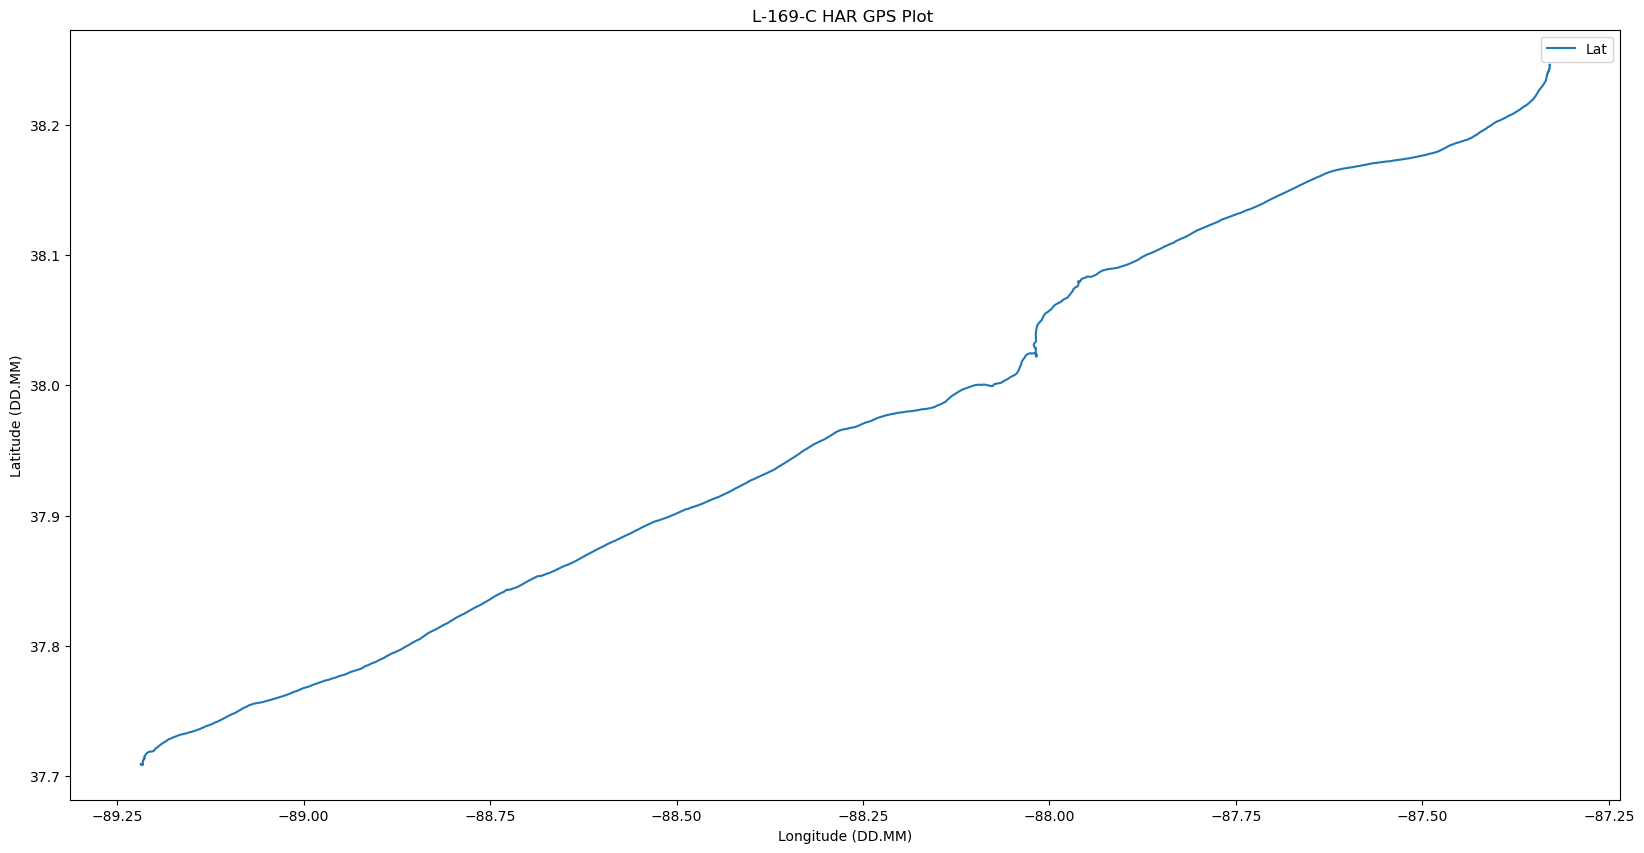

In [21]:
color = 'tab:blue'

har_df.plot(title='{} HAR GPS Plot '.format(flight_id),ylabel='Latitude (DD.MM)',xlabel='Longitude (DD.MM)',x='Lon',y='Lat',figsize=(20, 10))

plt.savefig('Plots/gps_plot_nomap.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/gps_plot_nomap.png',bbox_inches = 'tight',dpi = img_dpi)

## 3D plot
We can do a 3D plot that has the latitude, longitude and altitude. Again, there is no map for a reference but it does give us a fairly good picture of what the flight path looked like.

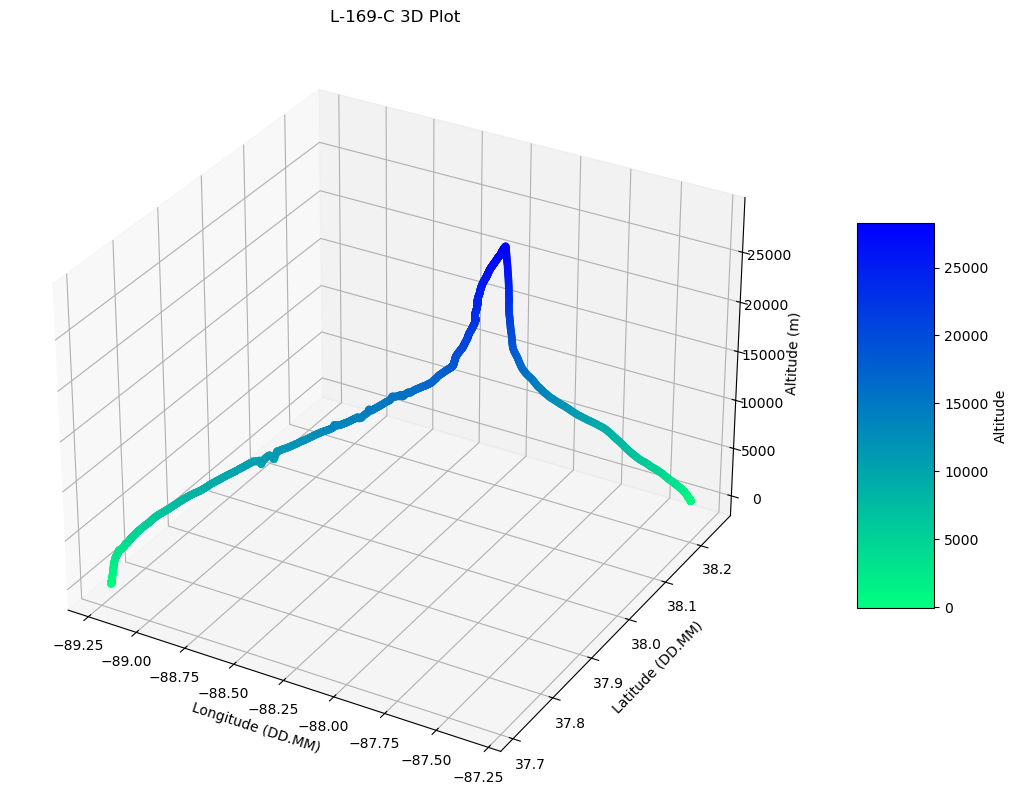

In [22]:
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D

ur = (42.133700, -93.494635)
ll = (42.042358, -93.692460)
# Creating a 3D plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting data
scatter = ax.scatter(har_df['Lon'], har_df['Lat'], har_df['Altitude'], c=har_df['Altitude'], cmap='winter_r', marker='o')

ax.plot3D(har_df['Lon'],har_df['Lat'],har_df['Altitude'])
ax.set_xlabel('Longitude (DD.MM)')
ax.set_ylabel('Latitude (DD.MM)')
ax.set_zlabel('Altitude (m)')
ax.set_title('{} 3D Plot'.format(flight_id))

# Adding a color bar to indicate altitude values
color_bar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
color_bar.set_label('Altitude')

plt.savefig('Plots/3D_Map_View.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/3D_Map_View.png',bbox_inches = 'tight',dpi = img_dpi)

## Mapping using BaseMaps
We can use timemapbase to download Open Street Map tiles. We will center this map on the launch location.

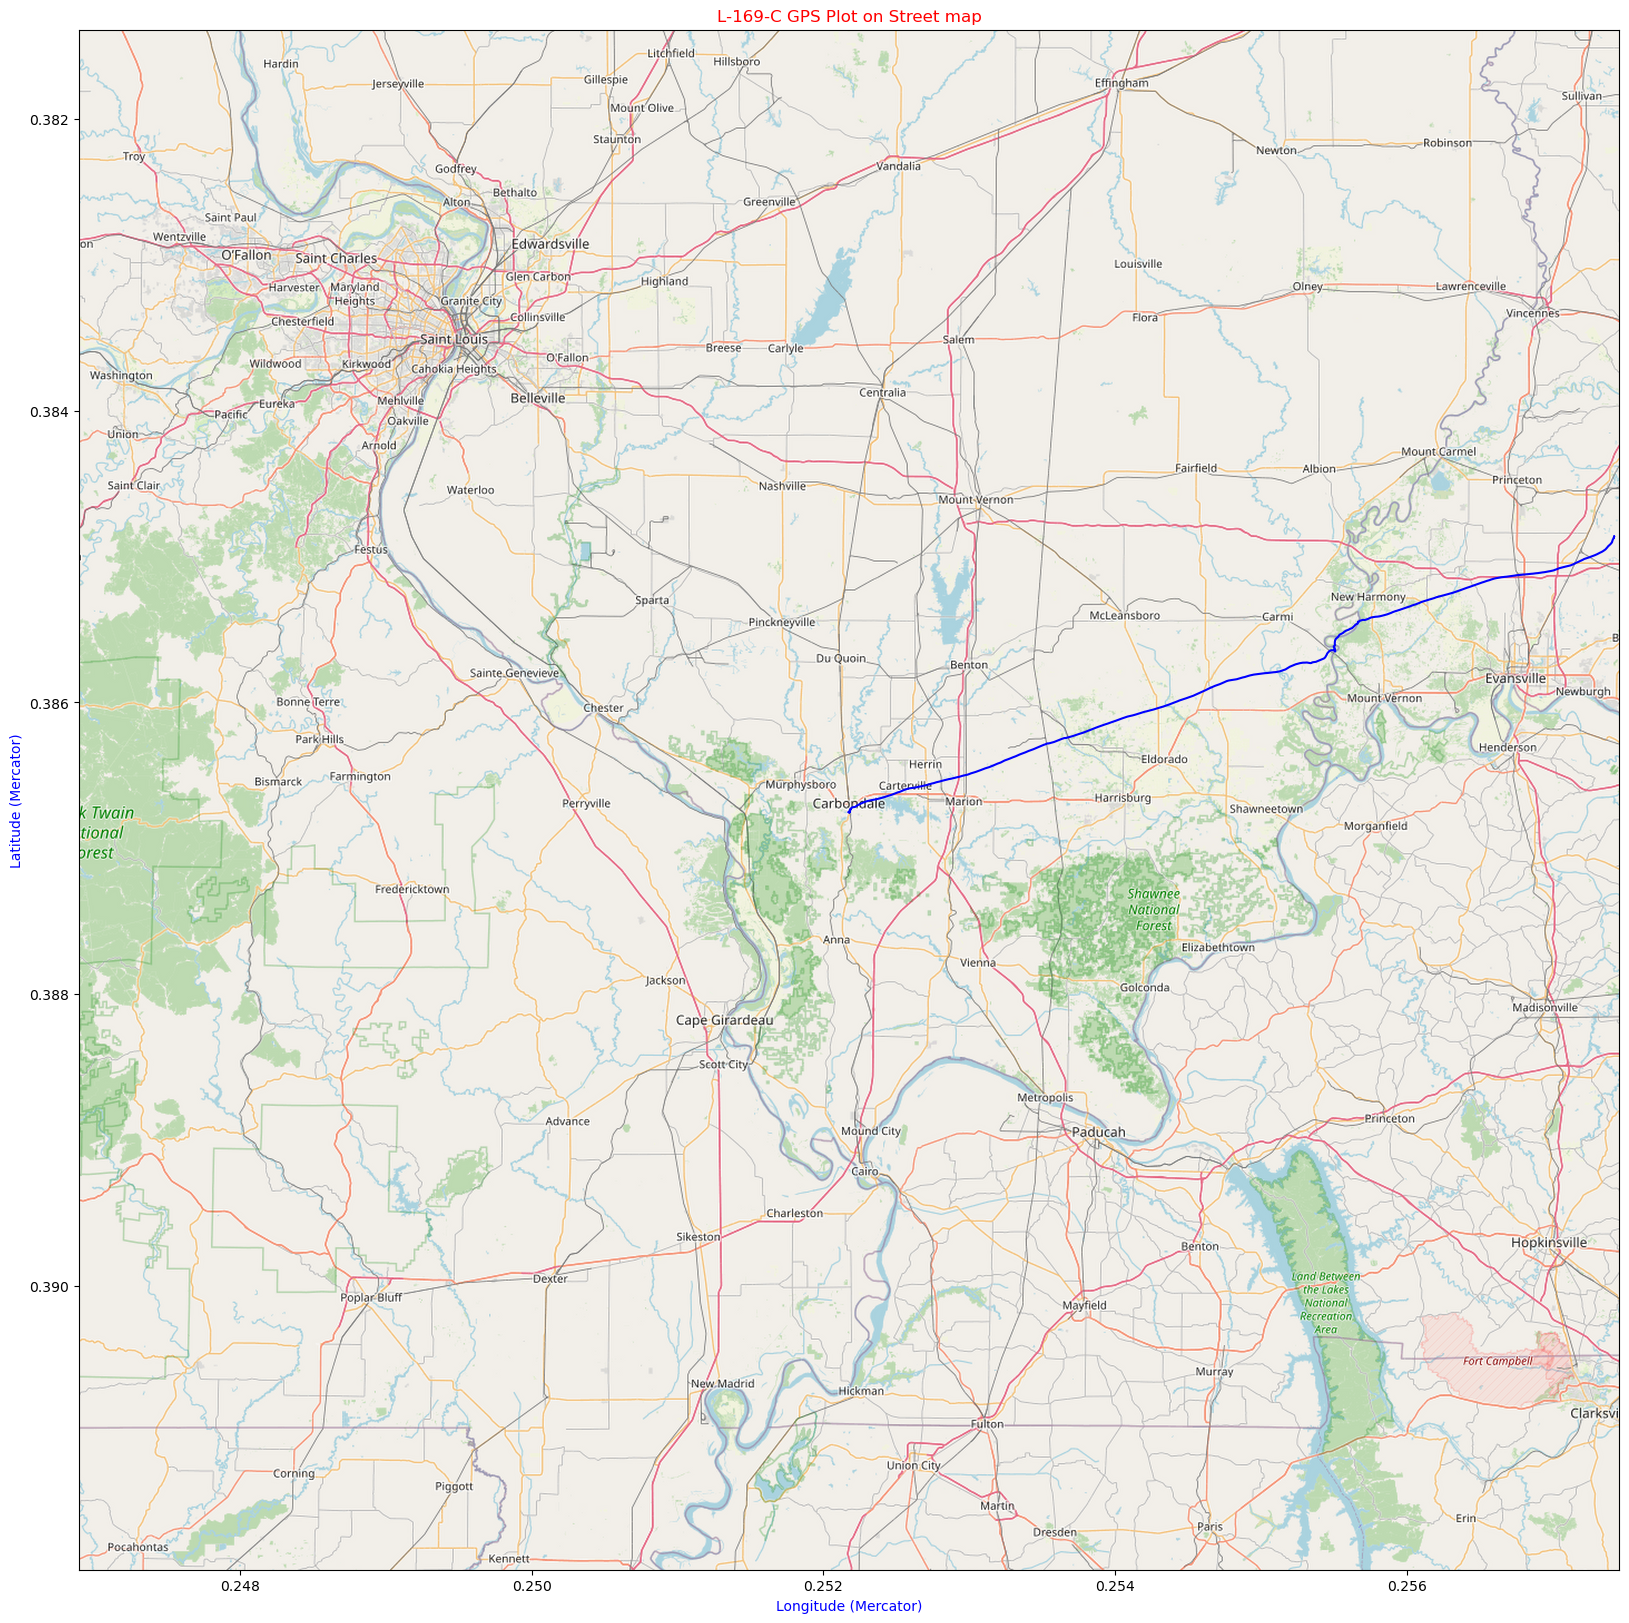

In [23]:
# Define the `extent`
color='blue'

# Zoom, the higher the number the zoomed out it will be. This is centered on
# the launch location
degree_range = 1.9

extent = tilemapbase.Extent.from_lonlat(launch_loc[1] - degree_range, launch_loc[1] + degree_range,
                  launch_loc[0] - degree_range, launch_loc[0] + degree_range)
extent = extent.to_aspect(1.0)

# Convert to web mercator
path = [tilemapbase.project(x,y) for x,y in zip(har_df['Lon'], har_df['Lat'])]
x, y = zip(*path)

fig, ax = plt.subplots(figsize=(20,20))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=800)
plotter.plot(ax)
plt.ylabel('Latitude (Mercator)', color=color)
plt.xlabel('Longitude (Mercator)', color=color)

plt.title("{} GPS Plot on Street map".format(flight_id),color='r')

ax.plot(x, y,"b-")
plt.savefig('Plots/gps_plot_map.pdf',bbox_inches = "tight",dpi = img_dpi)
plt.savefig('Plots/gps_plot_map.png',bbox_inches = "tight",dpi = img_dpi)

## Zooming in
We can zoom in, let's zoom in on the landing area. To do this we will change the center area based on the last longitutde and latitude recorded which is at the end of the flight. 

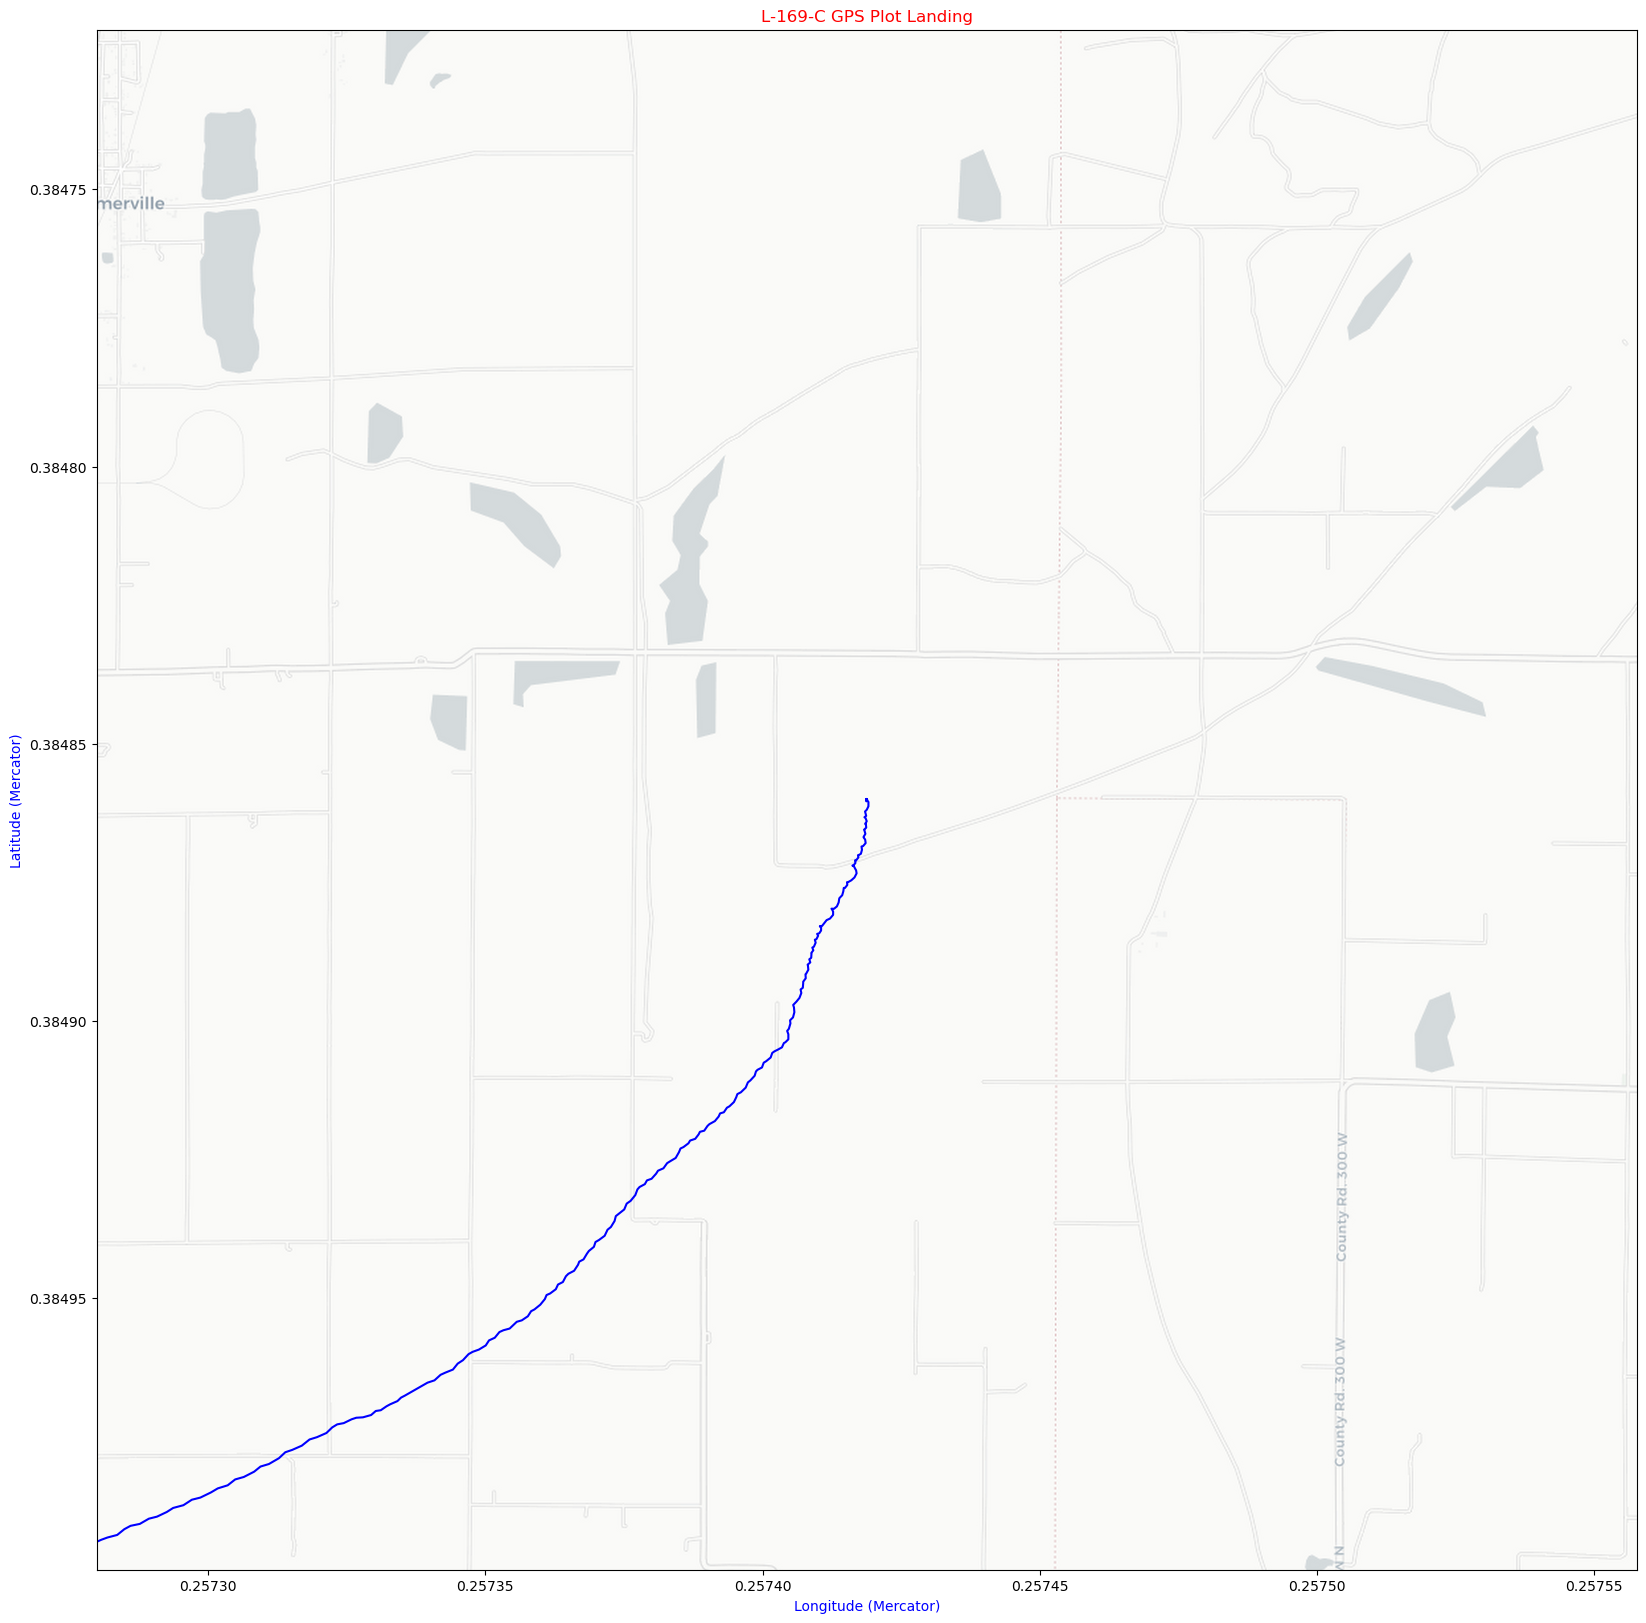

In [24]:
# Define the `extent`
color='blue'

# Zoom, the higher the number the zoomed out it will be. This is centered on
# the landing location
degree_range = 0.05

extent = tilemapbase.Extent.from_lonlat(har_df['Lon'].iloc[-1] - degree_range, har_df['Lon'].iloc[-1] + degree_range,
                  har_df['Lat'].iloc[-1] - degree_range, har_df['Lat'].iloc[-1] + degree_range)
extent = extent.to_aspect(1.0)

# Convert to web mercator
path = [tilemapbase.project(x,y) for x,y in zip(har_df['Lon'], har_df['Lat'])]
x, y = zip(*path)

fig, ax = plt.subplots(figsize=(20,20))
t = tilemapbase.tiles.Carto_Light
plotter = tilemapbase.Plotter(extent, t, width=800)
plotter.plot(ax)
plt.ylabel('Latitude (Mercator)', color=color)
plt.xlabel('Longitude (Mercator)', color=color)

plt.title("{} GPS Plot Landing".format(flight_id),color='r')

ax.plot(x, y,"b-")
plt.savefig('Plots/gps_plot_map_landing.pdf',bbox_inches = "tight",dpi = img_dpi)
plt.savefig('Plots/gps_plot_map_landing.png',bbox_inches = "tight",dpi = img_dpi)